## NBA Position Predictor Project

### Created 16 November 2021

## Initial Exploratory Data Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from get_stats import *

In [2]:
data = get_full_dataframe()

In [3]:
stats_df = data
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year
3,NaN,Al Horford,Bos,C,31.00,19,35.7,74.4,17.8,0.119,...,12.8,3.3,14.9,1.00,1.16,1.68,8.5,112.7,102.7,2017
4,NaN,Alec Burks,Uta,SG,26.00,9,13.4,27.9,28.9,0.103,...,11.2,1.9,25.9,0.44,0.11,0.89,10.7,110.0,101.1,2017
5,NaN,Alex Abrines,Okc,SG,24.00,6,18.3,38.2,8.5,0.046,...,7.5,0.3,2.4,0.83,0.33,0.17,3.2,119.8,102.0,2017
6,NaN,Al-Farouq Aminu,Por,SF,27.00,4,32.7,68.2,19.7,0.102,...,15.0,1.3,6.2,1.00,0.50,1.50,7.2,126.2,112.7,2017
7,NaN,Amir Johnson,Phi,PF,30.00,8,11.7,24.4,11.9,0.115,...,13.2,1.1,13.3,0.25,0.13,0.38,7.5,122.7,100.4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,NaN,Omer Yurtseven,Mia,C,23.58,33,15.6,32.5,19.5,14.100,...,23.6,1.2,12.2,0.45,0.52,0.97,9.4,109.8,93.2,2021
1488,NaN,Cody Zeller,Por,F-C,29.28,27,13.1,27.4,16.0,14.600,...,19.4,0.8,9.3,0.30,0.22,0.70,8.2,129.4,100.2,2021
1489,NaN,Ivica Zubac,Lac,C,24.83,39,24.4,50.7,14.3,16.200,...,17.2,1.1,6.7,0.49,1.08,1.28,7.1,131.6,98.0,2021
1490,NaN,Lindell Wigginton,Mil,G,23.80,1,4.6,9.6,9.3,0.000,...,11.4,0.0,0.0,1.00,0.00,0.00,0.0,200.0,98.1,2021


In [203]:
#test
[(i, list(set(stats_df[stats_df['Year'] == i]['POS']))) for i in range(2017, 2022)]

[(2017, ['PG', 'G', 'SG', 'SF', 'C', 'PF']),
 (2018, ['G', 'G-F', 'F-C', 'F-G', 'C-F', 'F', 'C']),
 (2019, ['G', 'G-F', 'F-C', 'F-G', 'C-F', 'F', 'C']),
 (2020, ['G', 'G-F', 'F-C', 'F-G', 'C-F', 'F', 'C']),
 (2021, ['G', 'G-F', 'F-C', 'F-G', 'C-F', 'F', 'C'])]

In [4]:
stats_df = stats_df[stats_df['Year'] != 2017]
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year
209,NaN,Marc Gasol,Tor,C,34.37,24,30.6,63.8,13.6,9.5,...,11.5,3.0,14.7,0.88,1.08,0.88,7.4,118.4,97.2,2018
210,NaN,Danny Green,Tor,G-F,31.98,24,28.5,59.4,12.6,13.6,...,7.0,1.1,5.4,1.29,0.46,1.08,4.2,97.4,101.6,2018
211,NaN,Serge Ibaka,Tor,F-C,29.74,24,20.8,43.4,21.4,10.6,...,15.8,0.9,7.4,0.46,0.96,1.04,7.1,105.5,91.9,2018
212,NaN,Kawhi Leonard,Tor,F,27.96,24,39.1,81.6,32.0,11.1,...,12.8,3.9,19.3,1.67,0.71,3.08,10.5,118.9,102.7,2018
213,NaN,Kyle Lowry,Tor,G,33.22,24,37.5,78.2,18.4,14.5,...,7.2,6.6,27.5,1.29,0.29,2.21,8.4,116.8,100.1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,NaN,Omer Yurtseven,Mia,C,23.58,33,15.6,32.5,19.5,14.1,...,23.6,1.2,12.2,0.45,0.52,0.97,9.4,109.8,93.2,2021
1488,NaN,Cody Zeller,Por,F-C,29.28,27,13.1,27.4,16.0,14.6,...,19.4,0.8,9.3,0.30,0.22,0.70,8.2,129.4,100.2,2021
1489,NaN,Ivica Zubac,Lac,C,24.83,39,24.4,50.7,14.3,16.2,...,17.2,1.1,6.7,0.49,1.08,1.28,7.1,131.6,98.0,2021
1490,NaN,Lindell Wigginton,Mil,G,23.80,1,4.6,9.6,9.3,0.0,...,11.4,0.0,0.0,1.00,0.00,0.00,0.0,200.0,98.1,2021


In [7]:
# replace positions to get two different player classifications:
pos_encode = {"G":0 , "F":1, "C":2, "GF":3, "FC":4}
pos_decode = {0:"G", 1:"F", 2:"C", 3:"GF", 4:"FC"}
# - POS3 = {"G", "F", "C"}
# - POS5 = {"G", "GF", "F", "FC", "C"}
stats_df.loc[:, "POS3"] = stats_df["POS"].replace("G-F", "G").replace("F-G", "F").replace("C-F", "C").replace("F-C", "F")
stats_df.loc[:, "POS5"] = stats_df["POS"].replace("G-F", "GF").replace("F-G", "GF").replace("C-F", "FC").replace("F-C", "FC")

stats_df.loc[:, "POS3"] = stats_df["POS3"].apply(lambda x: pos_encode[x])
stats_df.loc[:, "POS5"] = stats_df["POS5"].apply(lambda x: pos_encode[x])


In [8]:
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year,POS3,POS5
209,NaN,Marc Gasol,Tor,C,34.37,24,30.6,63.8,13.6,9.5,...,14.7,0.88,1.08,0.88,7.4,118.4,97.2,2018,2,2
210,NaN,Danny Green,Tor,G-F,31.98,24,28.5,59.4,12.6,13.6,...,5.4,1.29,0.46,1.08,4.2,97.4,101.6,2018,0,3
211,NaN,Serge Ibaka,Tor,F-C,29.74,24,20.8,43.4,21.4,10.6,...,7.4,0.46,0.96,1.04,7.1,105.5,91.9,2018,1,4
212,NaN,Kawhi Leonard,Tor,F,27.96,24,39.1,81.6,32.0,11.1,...,19.3,1.67,0.71,3.08,10.5,118.9,102.7,2018,1,1
213,NaN,Kyle Lowry,Tor,G,33.22,24,37.5,78.2,18.4,14.5,...,27.5,1.29,0.29,2.21,8.4,116.8,100.1,2018,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,NaN,Omer Yurtseven,Mia,C,23.58,33,15.6,32.5,19.5,14.1,...,12.2,0.45,0.52,0.97,9.4,109.8,93.2,2021,2,2
1488,NaN,Cody Zeller,Por,F-C,29.28,27,13.1,27.4,16.0,14.6,...,9.3,0.30,0.22,0.70,8.2,129.4,100.2,2021,1,4
1489,NaN,Ivica Zubac,Lac,C,24.83,39,24.4,50.7,14.3,16.2,...,6.7,0.49,1.08,1.28,7.1,131.6,98.0,2021,2,2
1490,NaN,Lindell Wigginton,Mil,G,23.80,1,4.6,9.6,9.3,0.0,...,0.0,1.00,0.00,0.00,0.0,200.0,98.1,2021,0,0


In [9]:
print(stats_df.groupby('POS3')['POS3'].count())
print(stats_df.groupby('POS5')['POS5'].count())

POS3
0    544
1    447
2    139
Name: POS3, dtype: int64
POS5
0    439
1    327
2     95
3    152
4    117
Name: POS5, dtype: int64


In [167]:
stats_df['POS'].isin(["F", "G"])

209     False
210     False
211     False
212      True
213      True
        ...  
1474     True
1476     True
1479    False
1481    False
1483     True
Name: POS, Length: 1119, dtype: bool

In [10]:
stats_df.describe()

,RANK,AGE,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,...,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year,POS3,POS5
count,0.0,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,...,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000
mean,NaN,27.144788,16.236283,20.746372,43.215664,18.601150,11.771770,33.630088,0.680027,81.557522,...,12.888496,0.624743,0.398345,1.101257,6.406814,107.957257,103.528319,2020.004425,0.641593,1.275221
std,NaN,4.218263,12.737588,10.436449,21.746504,6.316649,6.816085,46.635227,0.279818,102.463702,...,10.132207,0.474342,0.438670,0.946035,2.886289,22.467109,6.399121,1.146867,0.690211,1.366889
min,NaN,19.060000,1.000000,4.000000,8.300000,4.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.100000,2018.000000,0.000000,0.000000
25%,NaN,23.700000,5.000000,11.400000,23.700000,14.100000,8.000000,4.000000,0.600750,12.000000,...,6.225000,0.270000,0.090000,0.440000,5.100000,99.400000,100.100000,2019.000000,0.000000,0.000000
50%,NaN,26.795000,12.000000,20.150000,42.000000,17.700000,11.200000,16.000000,0.756000,39.000000,...,10.200000,0.530000,0.290000,0.830000,6.500000,109.500000,104.000000,2020.000000,1.000000,1.000000
75%,NaN,30.030000,27.000000,29.875000,62.175000,22.375000,14.900000,43.000000,0.855000,111.000000,...,17.775000,0.920000,0.540000,1.500000,8.000000,118.375000,107.700000,2021.000000,1.000000,2.000000
max,NaN,41.600000,45.000000,41.300000,86.100000,48.000000,50.000000,369.000000,1.000000,626.000000,...,76.900000,2.800000,4.000000,5.170000,17.400000,280.100000,121.300000,2021.000000,2.000000,4.000000


In [11]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 209 to 1491
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    0 non-null      float64
 1   NAME    1130 non-null   object 
 2   TEAM    1130 non-null   object 
 3   POS     1130 non-null   object 
 4   AGE     1130 non-null   float64
 5   GP      1130 non-null   int64  
 6   MPG     1130 non-null   float64
 7   MIN%    1130 non-null   float64
 8   USG%    1130 non-null   float64
 9   TO%     1130 non-null   float64
 10  FTA     1130 non-null   int64  
 11  FT%     1130 non-null   float64
 12  2PA     1130 non-null   int64  
 13  2P%     1130 non-null   float64
 14  3PA     1130 non-null   int64  
 15  3P%     1130 non-null   float64
 16  eFG%    1130 non-null   float64
 17  TS%     1130 non-null   float64
 18  PPG     1130 non-null   float64
 19  RPG     1130 non-null   float64
 20  TRB%    1130 non-null   float64
 21  APG     1130 non-null   float64
 22

### k-Nearest Neighbor Classification

In [16]:
#divide the data into the input 'X' and the labels 'y'
#selected_features = ['MIN%', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG',
#                     'RPG', 'TRB%','APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG']
selected_features = [i for i in list(stats_df)[4:-3]]# if i not in ['MPG', 'PPG']]
X        = stats_df[selected_features] #the observations
y        = stats_df['POS3'] #the label

In [19]:
def kNearest(X, y):
    
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6, stratify = y)
    # Enter appropriate values to partition data, and ensure results are reproducible and obtain stratified samples
    
    # feature scaling
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std, X_test_std = sc.transform(X_train), sc.transform(X_test)    
    
    k = []
    accuracy = []
    # build the k-nn model, experiment with different values of k and plot the results
    for i in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train_std, y_train)
        k.append(i)
        accuracy.append(knn.score(X_test_std, y_test)*100)
        # print(knn.predict(X_test))
        # print('The accuracy of the model is {}'.format(knn.score(X_test, y_test)))

    best = sorted([t for t in zip(k, accuracy) if t[1] == max(accuracy)], key = lambda x: x[0])[0]
    print(best)
    acc = pd.DataFrame({'k': k, 'accuracy': accuracy})
    lines = acc.plot.line(x = 'k')
    
    #print(list(zip(k, accuracy)))
    print(f'The Optimal value for k is {best[0]}')
    
    knn = KNeighborsClassifier(n_neighbors=best[0]) 
    knn.fit(X_train_std, y_train)
    y_pred=knn.predict(X_test_std)
    print(classification_report(y_test, y_pred))

(3, 67.2566371681416)
The Optimal value for k is 3
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       163
           1       0.59      0.61      0.60       134
           2       0.73      0.38      0.50        42

    accuracy                           0.67       339
   macro avg       0.68      0.60      0.62       339
weighted avg       0.67      0.67      0.67       339



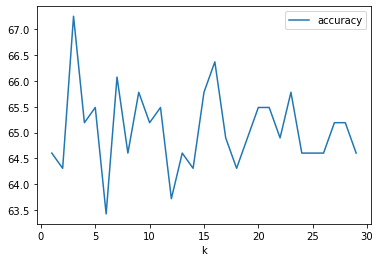

In [20]:
kNearest(X, stats_df['POS3'])

(10, 57.52212389380531)
The Optimal value for k is 10
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       132
           1       0.46      0.54      0.50        98
           2       0.58      0.39      0.47        28
           3       0.47      0.17      0.25        46
           4       0.44      0.11      0.18        35

    accuracy                           0.58       339
   macro avg       0.52      0.42      0.43       339
weighted avg       0.55      0.58      0.53       339



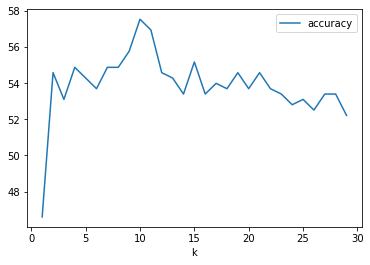

In [21]:
kNearest(X, stats_df['POS5'])

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [34]:
rf = RandomForestRegressor(n_estimators=10, random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=7)

In [35]:
#predict the labels for the test set
y_pred   = rf.predict(X_test)

print('The prediction is: {}'.format(y_pred))

mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The prediction is: [0.4 0.4 0.  0.1 0.  0.2 0.1 0.6 0.  1.4 0.8 0.3 0.5 0.6 0.5 0.7 0.5 0.3
 0.9 0.  0.5 0.5 0.1 0.4 0.  0.3 0.8 0.6 1.5 0.1 0.3 0.8 0.4 0.4 0.4 1.8
 0.7 0.  1.1 0.5 0.7 0.5 0.8 0.1 1.5 0.3 0.1 0.7 0.1 0.3 1.1 0.6 0.3 1.2
 1.  1.7 0.  0.5 0.  0.8 0.  0.5 1.  1.9 1.7 0.7 1.5 0.  0.1 0.8 0.6 0.5
 1.7 0.7 0.1 1.  0.3 0.9 1.6 0.9 0.8 0.2 0.3 0.  0.2 0.5 0.  0.8 1.  0.1
 2.  0.8 0.2 0.  1.7 0.5 0.8 0.8 0.1 0.2 0.7 0.6 0.3 0.  0.  0.7 1.4 0.8
 0.  1.  0.  1.1 0.1 0.  1.3 0.4 0.  0.  0.  0.8 0.4 0.1 0.9 0.2 0.6 1.
 1.3 0.2 1.6 0.2 1.9 1.7 0.8 0.  0.3 1.1 0.5 1.3 0.1 0.6 0.9 1.1 0.1 1.3
 0.9 0.4 1.9 0.  0.7 0.3 0.6 0.7 1.4 0.3 1.2 0.1 1.2 0.7 0.9 1.7 1.  0.7
 0.1 0.8 0.7 0.  0.  1.  0.8 1.  0.6 0.9 1.1 1.7 0.  0.7 1.  0.8 1.  0.4
 0.  1.3 0.6 0.3 1.2 1.5 0.6 1.6 1.6 1.5 0.6 0.  0.2 0.4 0.4 0.  0.7 0.5
 0.1 0.5 0.9 1.3 1.9 0.9 0.3 1.3 1.2 0.  0.8 0.5 0.1 0.6 1.3 0.2 0.1 0.2
 0.8 0.1 1.8 0.6 0.1 1.6 1.1 0.1 1.6 0.  1.3 0.  0.2 0.6 0.4 0.3 0.2 0.4
 1.8 0.9 1.1 0.7 0.4 0.1 1.6 0.4 

In [36]:
n = max(rf.feature_importances_)
param = selected_features[list(rf.feature_importances_).index(n)]
print(f"The most important parameter was '{param}'.")

The most important parameter was 'TRB%'.


In [38]:
#sorted([(n, selected_features[list(rf.feature_importances_).index(n)]) for n in rf.feature_importances_], key = lambda x: x[0])

### Support Vector Machine

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [25]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6, stratify = y)
# Enter appropriate values to partition data, and ensure results are reproducible and obtain stratified samples


# feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std, X_test_std = sc.transform(X_train), sc.transform(X_test)    


In [29]:
#initialize the classifier

svm = SVC() #the default kernel is rbf
svm.fit(X_train_std, y_train) #fit the data

SVC()

In [30]:
#predict the labels for the test set
y_pred   = svm.predict(X_test_std)

print('The prediction is: {}'.format(y_pred))

The prediction is: [0 0 0 0 0 0 0 0 0 2 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 2 1 1 1 0 0 1 0 1 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 2 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 2 2 0 0 0 1 1 1 0 1 1 1 0 2 1 0 2 0
 1 0 0 0 1 0 1 0 1 1 0 2 1 1 0 1 1 0 0 1 1 1 0 1 1 2 0 1 1 1 0 0 0 1 0 1 1
 2 1 2 1 1 0 0 0 0 0 0 1 0 0 0 1 1 2 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 2 0 0 2
 1 0 1 0 1 0 0 0 1 0 0 0 2 0 1 1 0 0 1 0 0 1 2 1 0 1 1 0 1 0 0 1 0 1 1 1 0
 0 1 0 1 2 0 1 0 0 1 0 0 0 0 1 2 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 2 1 0 1 0 0 0 1 1
 0 1 0 1 0 1]


In [31]:
#evaluate the prediction accuracy
print('The accuracy of the model is: {}'.format(svm.score(X_test_std, y_test)))

The accuracy of the model is: 0.7020648967551623


In [32]:
#get the classification report
target_names = ['G', 'F', 'C']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           G       0.76      0.82      0.78       163
           F       0.62      0.66      0.64       134
           C       0.84      0.38      0.52        42

    accuracy                           0.70       339
   macro avg       0.74      0.62      0.65       339
weighted avg       0.71      0.70      0.70       339

